# In Search of a New Musical Genre, Using Spotify Data
**Alex Nisnevich**

## Introduction

I want to come up with a new musical genre.

Let's think of a genre as a set of characteristics that songs share. If we look at the space of all potential characteristics of songs, genres are subspaces of it. The most clearly defined genres should intuitively be clearly separated from other genres without too much overlap.

So, how does one go about finding a new set of musical characteristics to create an original genre of music from? Well, we'd have to find a subspace (a "niche") that's unoccupied, and fill it.

Let's try to find such a niche with data.

## I. Data Collection

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

What better dataset to use than Spotify itself? I cooked up a quick [Ruby script](https://github.com/AlexNisnevich/spotify-genre-features) to extract 50 (hopefully representative) songs for each genre within Spotify and get feature vectors of each song's ["audio features"](https://developer.spotify.com/web-api/get-several-audio-features/), a set of variables ranging from "acousticness" to valence ("musical positivity").

In [2]:
songs = pd.read_csv('https://raw.githubusercontent.com/AlexNisnevich/spotify-genre-features/master/features.csv')

Here's a sample of the kind of musical characteristics that we're dealing with:

In [3]:
songs.sample(5)

,id,genre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1750,1he1D2P1ymoVA1N3mOGylG,honky-tonk,0.63200,0.759,182333,0.706,0.000063,9,0.373,-7.254,1,0.0317,134.271,4,0.763
3393,02srSkeu2pzybuVr2B9TJm,soul,0.73200,0.564,178747,0.594,0.003660,9,0.343,-9.245,1,0.0328,120.749,4,0.767
1072,7AKEHgmBqr8VmXJ8HvFg68,edm,0.01340,0.621,327654,0.791,0.003320,2,0.088,-5.879,0,0.0460,125.997,4,0.483
457,3bkZReCuqrYw0WALEnSqXz,chicago-house,0.00131,0.801,292500,0.712,0.865000,10,0.580,-5.036,0,0.0578,128.026,4,0.725
1222,6wPXvudEW0YVImqv6jr0RE,emo,0.00158,0.299,236560,0.913,0.003310,9,0.122,-7.645,1,0.0598,101.059,3,0.169


For the most part, we're interested in genres, not individual songs, so let's pivot by genre (taking the mean of each feature):

In [4]:
genres = songs.pivot_table(index=['genre'])

In [5]:
genres.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,
afrobeat,0.193625,0.657720,325293.000000,0.764620,0.362610,4.280000,0.156580,-8.248540,0.560000,0.064238,118.003660,3.960000,0.819140
ambient,0.808006,0.313802,356026.600000,0.207660,0.896420,5.340000,0.128308,-21.637880,0.520000,0.043848,104.529680,3.800000,0.154952
anime,0.070591,0.567731,247769.961538,0.796692,0.037501,6.653846,0.218781,-5.788577,0.538462,0.067327,128.222308,3.961538,0.543692
black-metal,0.007900,0.267830,323244.980000,0.905980,0.450004,5.920000,0.248532,-5.556940,0.500000,0.093300,123.503000,3.880000,0.142944
bluegrass,0.656116,0.532480,214257.920000,0.500400,0.136489,4.760000,0.194482,-10.648180,0.820000,0.035348,126.398900,3.980000,0.672560


## II. Exploration

Now let's plot some features against one another and see if we find any obvious gaps.

First, let's try plotting tempo against loudness:

/Users/alex/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


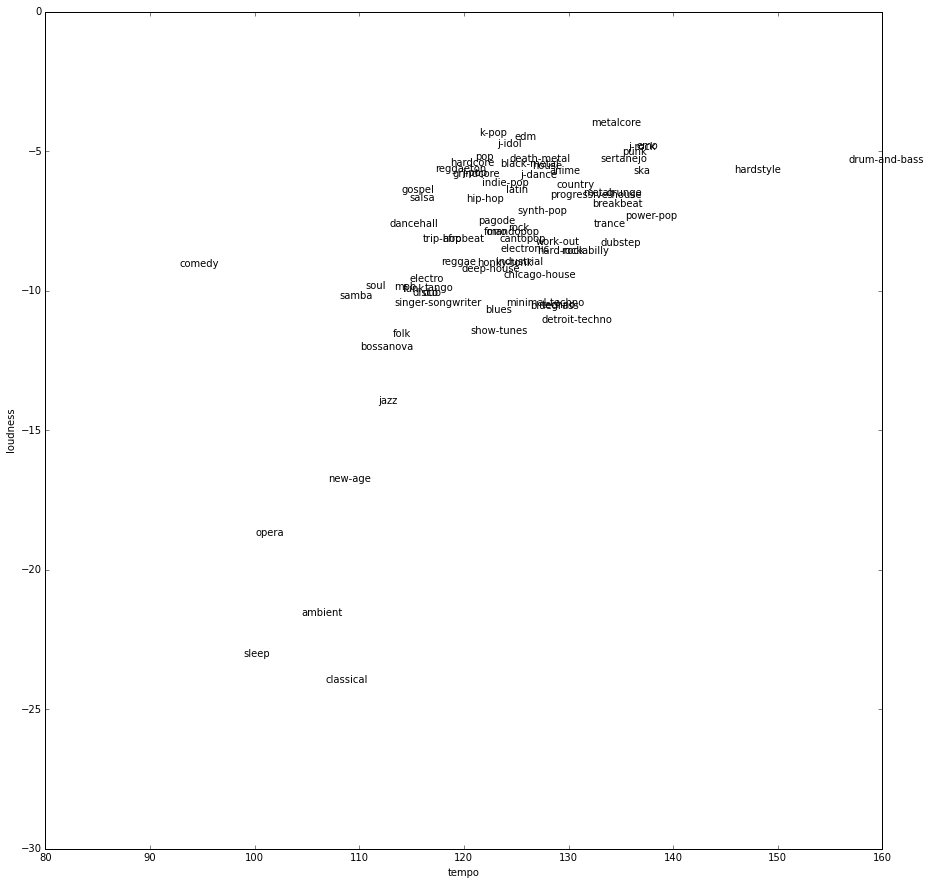

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
genres.plot.scatter('tempo', 'loudness', ax=ax, s=0) # To get the right x/y bounds
ax.set_xlabel('tempo')
ax.set_ylabel('loudness')
for k, v in genres.iterrows():
    ax.annotate(k, (v['tempo'], v['loudness']))

Nothing too exciting here. Most genres are clustered in a tight ball around 110-140 bpm and loudness in the -13 to -5 dB range.

Let's try using more expressive features. How about valence (musical positivity) and danceability?

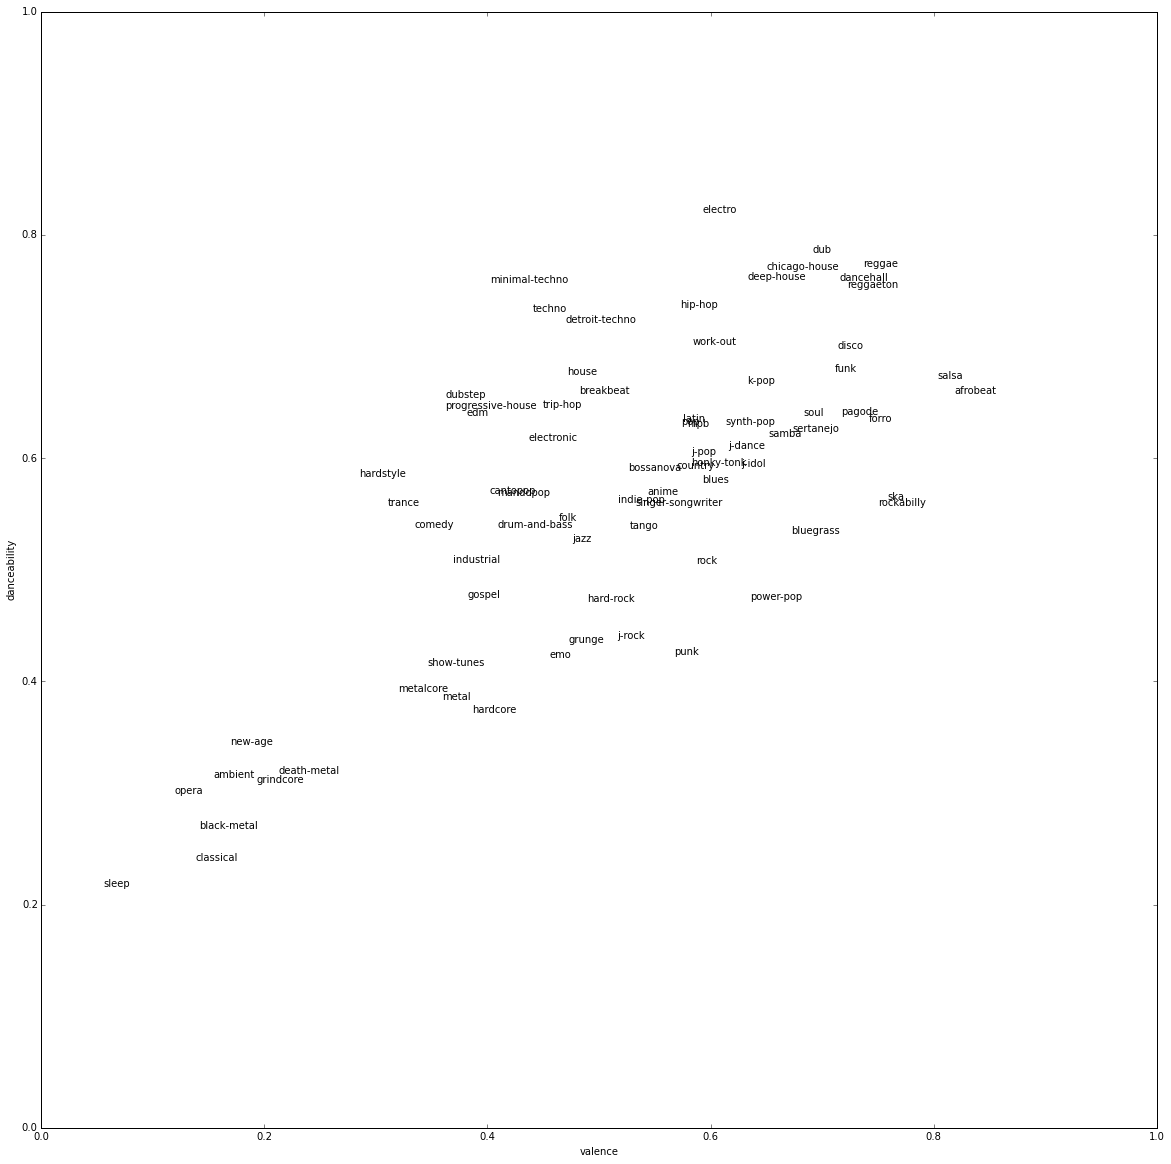

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('valence')
ax.set_ylabel('danceability')
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['danceability']))

The pattern is a little more interesting now: valence and danceability tend to be correlated (which makes sense!), but, for example, techno is disproportionally danceable given its middling positivity, while rockabilly is disproportionally positive compared to its danceability. So there's a bit of a spectrum there. That makese sense too.

Still, no obvious gaps ...

How about valence vs. energy? These two seem to be less closely related to one another (for example, metal is very high-energy and typically low-valence), and thus should result in a more interesting graph.

And we're right:

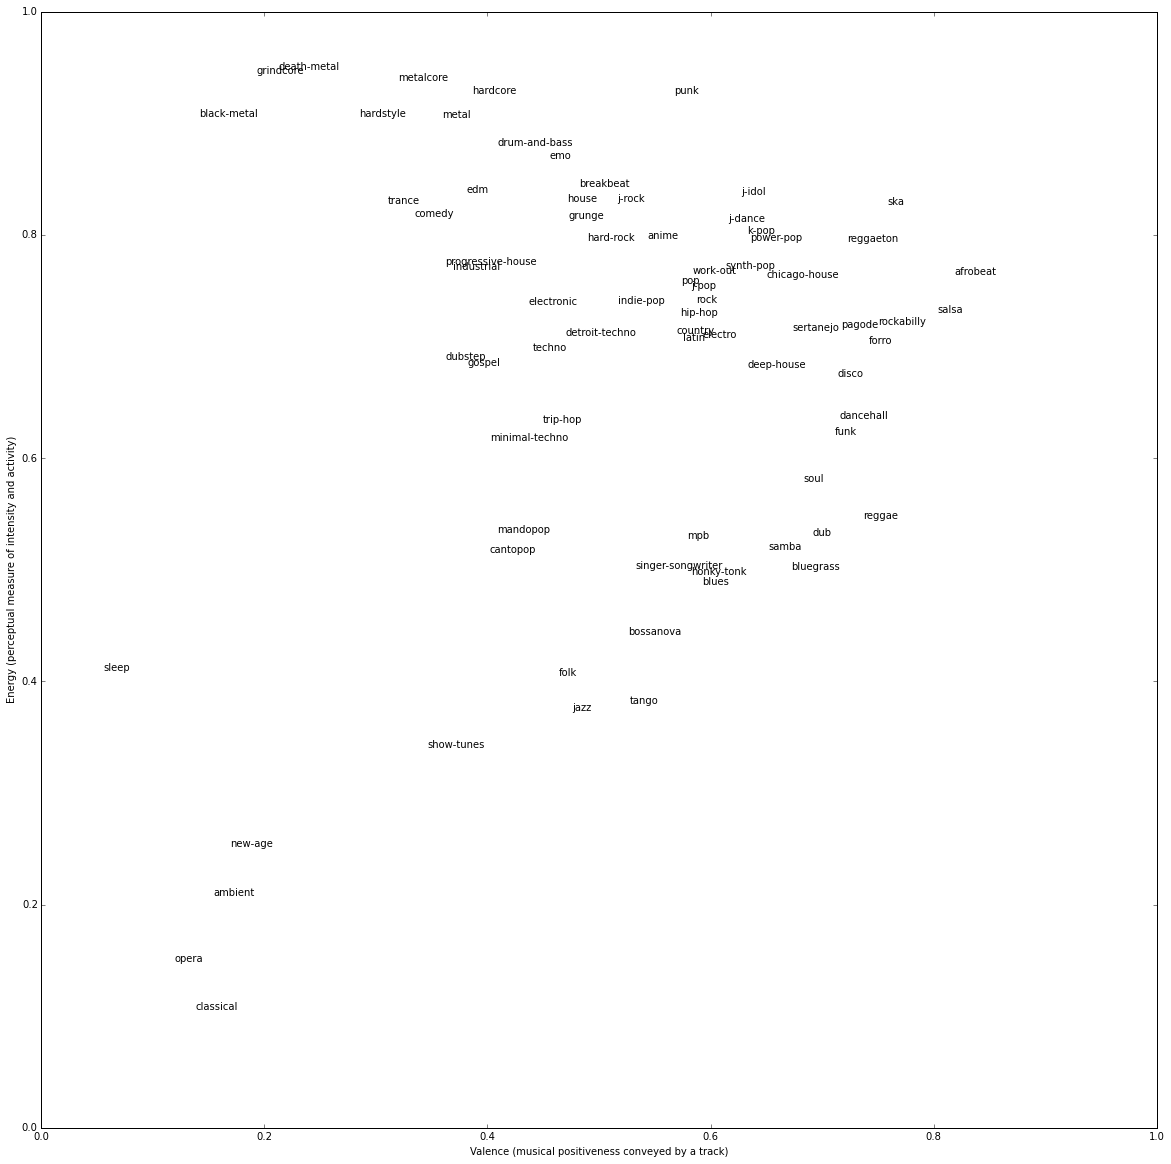

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('Valence (musical positiveness conveyed by a track)')
ax.set_ylabel('Energy (perceptual measure of intensity and activity)')
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['energy']))

Now _that's_ interesting, the genres are kind of all over the place now. And, look at that big empty circle in the middle!

That empty gap, between MPB and "latin" (or techno) in energy and between trip-hop and funk in valence, seems like just the sort of place for a new genre to arise.

A natural question arises: is there _any_ music that fits that gap? Is it a gap from a song-by-song perspective or only from a genre-by-genre perspective? Let's examine that by plotting all our songs:

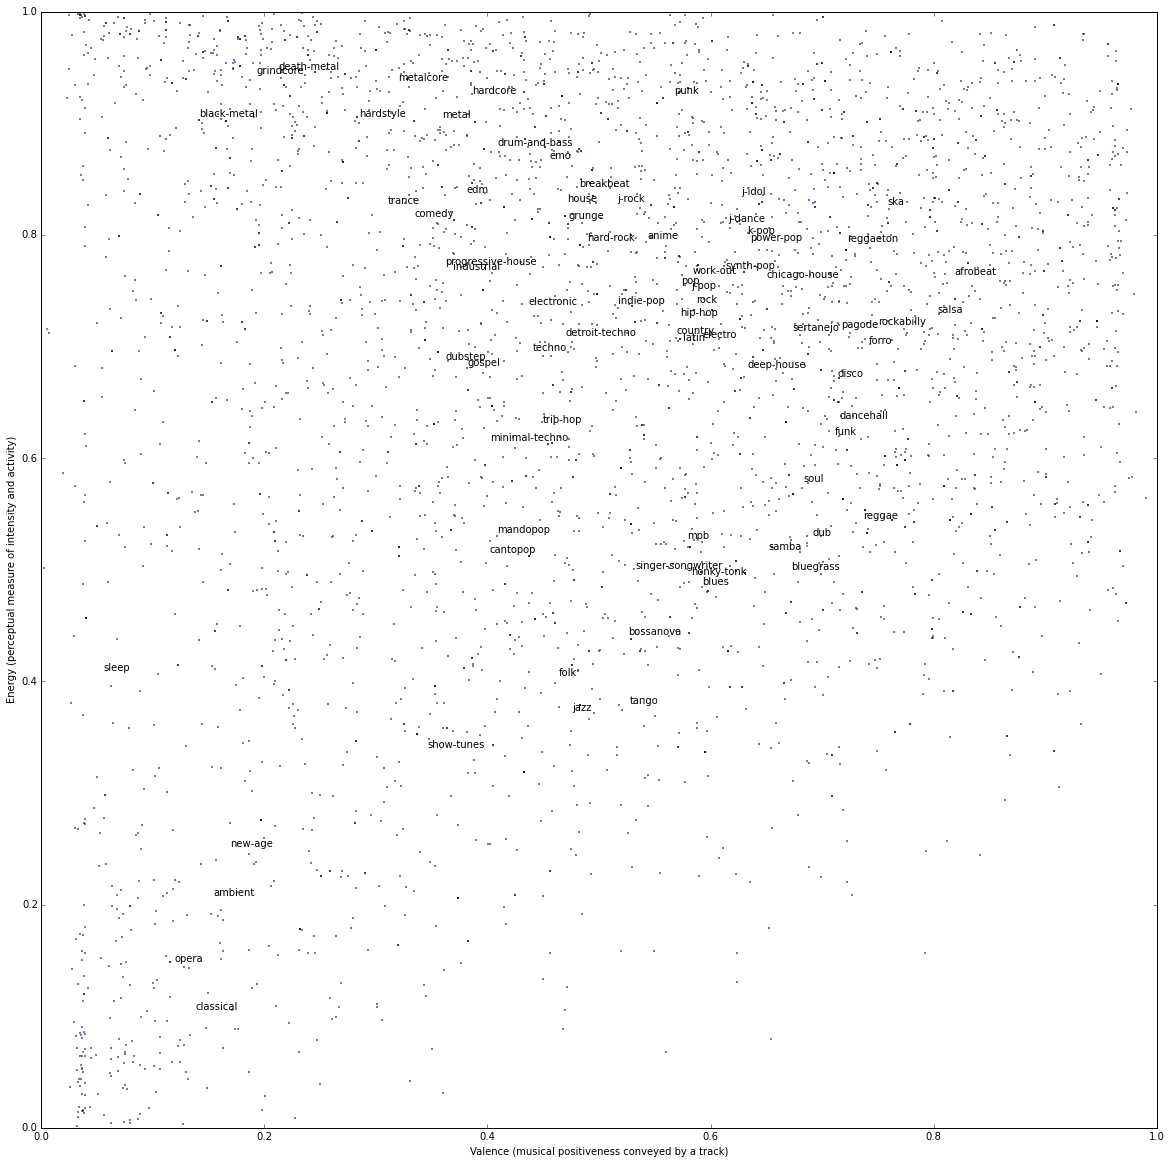

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('Valence (musical positiveness conveyed by a track)')
ax.set_ylabel('Energy (perceptual measure of intensity and activity)')
ax.plot(songs.valence, songs.energy, marker='o', linestyle='', ms=1)
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['energy']))

Ah, looks like there's definitely songs occupying this gap.

## III. Digging Deeper

Let's zoom in on the hole we found:

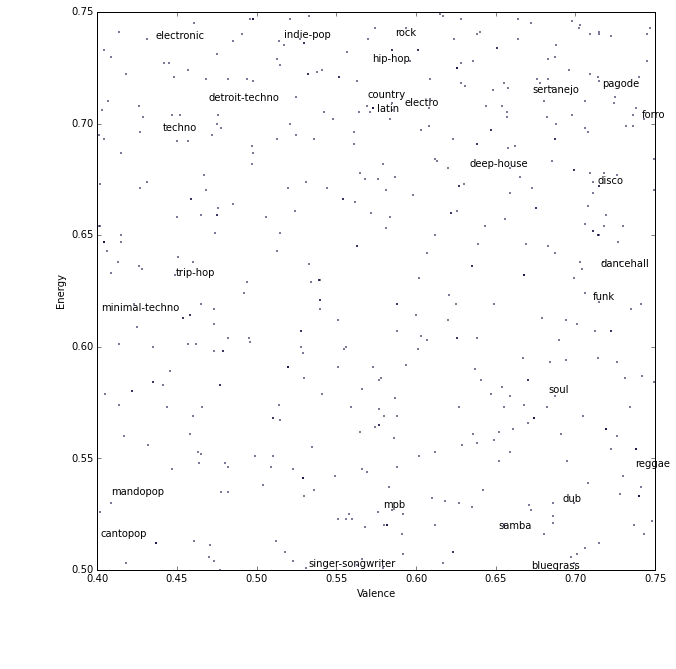

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Valence')
ax.set_ylabel('Energy')
ax.plot(songs.valence, songs.energy, marker='o', linestyle='', ms=1)
ax.set_xbound([0.4, 0.75])
ax.set_ybound([0.5, 0.75])
for k, v in genres.iterrows():
    ax.annotate(k, (v['valence'], v['energy']))

Now let's zoom in even further, to find the exact tracks that are closest to our "target" (halfway between MPB and Latin, and halfway between funk and trip-hop)

In [11]:
x_target = (genres['valence']['trip-hop'] + genres['valence']['funk']) / 2
y_target = (genres['energy']['latin'] + genres['energy']['mpb']) / 2

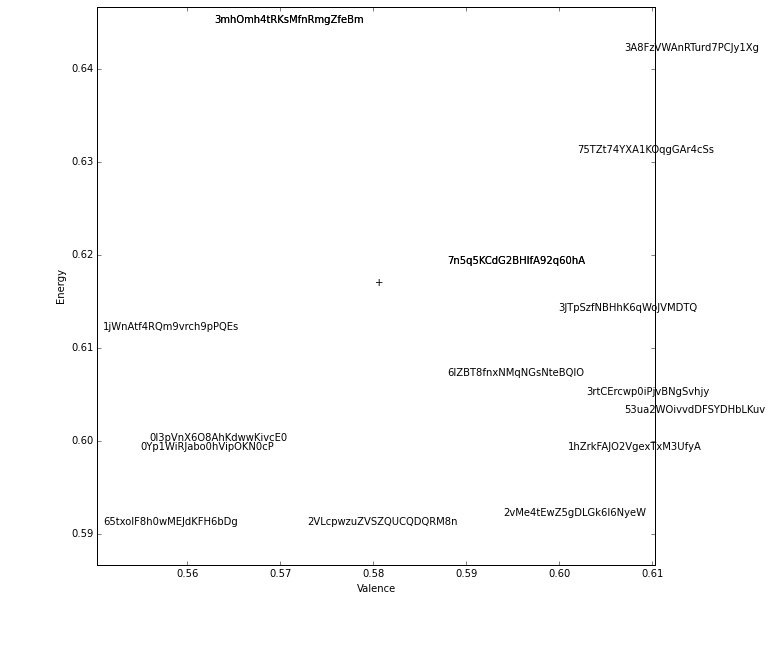

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Valence')
ax.set_ylabel('Energy')
ax.set_xbound([x_target - 0.03, x_target + 0.03])
ax.set_ybound([y_target - 0.03, y_target + 0.03])
ax.annotate('+', (x_target, y_target))
for k, v in songs.iterrows():
    ax.annotate(v['id'], (v['valence'], v['energy']))

And what _are_ the closest songs to our target?

In [13]:
songs['distance'] = abs(songs['valence'] - x_target) ** 2 + abs(songs['energy'] - y_target) ** 2

In [14]:
songs.sort_values('distance')[:10]

,id,genre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,distance
388,7n5q5KCdG2BHlfA92q60hA,cantopop,0.377,0.718,205464,0.619,0.000000,4,0.0912,-8.500,1,0.0298,98.011,4,0.588,0.000065
2214,7n5q5KCdG2BHlfA92q60hA,mandopop,0.377,0.718,205464,0.619,0.000000,4,0.0912,-8.500,1,0.0298,98.011,4,0.588,0.000065
3466,6IZBT8fnxNMqNGsNteBQlO,tango,0.169,0.572,203373,0.607,0.879000,0,0.0923,-8.214,1,0.1190,66.821,4,0.588,0.000153
2963,3JTpSzfNBHhK6qWoJVMDTQ,rockabilly,0.676,0.602,140120,0.614,0.000003,7,0.2040,-11.799,1,0.0679,140.046,4,0.600,0.000395
2091,3rtCErcwp0iPjvBNgSvhjy,jazz,0.368,0.497,260827,0.605,0.012200,2,0.0378,-9.505,0,0.0425,88.237,4,0.603,0.000652
543,75TZt74YXA1KOqgGAr4cSs,comedy,0.870,0.586,333264,0.631,0.000000,10,0.2980,-8.676,1,0.9050,82.155,4,0.602,0.000677
2156,2VLcpwzuZVSZQUCQDQRM8n,latin,0.401,0.620,192308,0.591,0.000000,1,0.1380,-7.085,1,0.0304,148.060,4,0.573,0.000712
2360,1hZrkFAJO2VgexTxM3UfyA,minimal-techno,0.335,0.796,368353,0.599,0.845000,10,0.0708,-10.344,0,0.0567,125.002,4,0.601,0.000741
3163,2vMe4tEwZ5gDLGk6l6NyeW,show-tunes,0.635,0.472,186480,0.592,0.000000,11,0.2180,-8.309,0,0.2220,97.740,3,0.594,0.000796
3688,0l3pVnX6O8AhKdwwKivcE0,work-out,0.104,0.730,200829,0.600,0.000000,1,0.1330,-11.481,0,0.0743,97.972,4,0.556,0.000868


Decoding the Spotify song hashes gives us our five songs most emblematic of this "new" potential genre, and it's quite the eclectic mix!

- [Fly with me (『莫非,這就是愛情』片頭曲) By 溫嵐](https://open.spotify.com/track/7n5q5KCdG2BHlfA92q60hA)
- [La Vista Gorda by Fernando Otero](https://open.spotify.com/track/6IZBT8fnxNMqNGsNteBQlO)
- [Wooly Bully by Sam The Sham & The Pharaohs](https://open.spotify.com/track/3JTpSzfNBHhK6qWoJVMDTQ)
- [Music Prayer For Peace by Ernie Watts](https://open.spotify.com/track/3rtCErcwp0iPjvBNgSvhjy)
- [Me Duele Amarte by Reik](https://open.spotify.com/track/2VLcpwzuZVSZQUCQDQRM8n)

## Conclusion / Future Work

This has of course been rather silly, but still an interesting piece of data exploration.

Using only Spotify song features, we found a musical niche (within the valence/energy plane) that seems to not be filled by any one genre, though occupied by a diverse group of songs.

If I were to work on this idea more, here's some other things I'd like to try:
- Looking at higher-dimensional data (e.g. 3d plots ... dimensionality reduction via PCA ...) to find holes
- A more principled method of finding holes that doesn't rely on visual inspection
- Observing the clusters formed by each genre rather than just taking the mean of each song within it
- More data!